# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is : data.csv.
- The codebook (explaining what the variables mean) is : codebook.csv.

In [1]:
# READ IN THE DATA SET HERE
%matplotlib inline
import pandas as pd

# 1. Read the csv file into a Pandas Dataframe.
df = pd.read_csv("data.csv")
#2. Display initial rows. 
df.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,...,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,...,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,...,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later. 

<AxesSubplot:xlabel='Condition'>

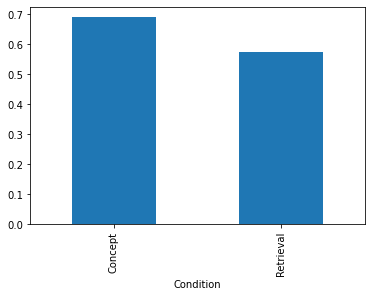

In [2]:
# YOUR CODE HERE
X = df.groupby("Condition")["PR.2"].mean()
X.plot.bar()

**YOUR EXPLANATION HERE** Subjects that made concept maps on average gave themselves a better score than the subjects that practiced retrieval. We see that on average, concept map subjects gave themselves a predicted score of 0.69 and retrieval subjects gave themselves a score of 0.58 on average.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

<AxesSubplot:xlabel='Condition'>

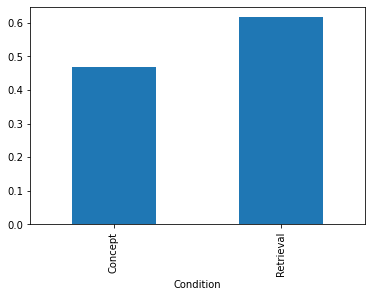

In [3]:
# YOUR CODE HERE
Y = df.groupby("Condition")["TS.avg"].mean()
Y.plot.bar()

In [4]:
dif = Y - X
dif.abs()

Condition
Concept      0.221538
Retrieval    0.040000
dtype: float64

**YOUR EXPLANATION HERE** On average, subjects that practiced retrieval did better on the follow up tests than the subjects that practiced making concept maps.


# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

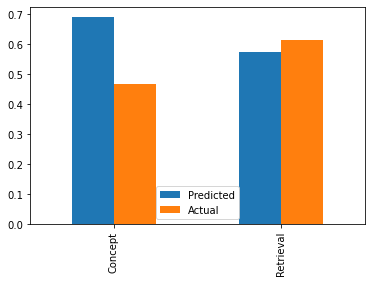

In [5]:
df = pd.DataFrame({'Predicted': X,
                   'Actual': Y}, index=["Concept", "Retrieval"])
ax = df.plot.bar()

In [6]:
import numpy as np
df = pd.read_csv("data.csv")
## measures the average of the squares of the errors—that is, 
## the average squared difference between the estimated values and the actual value
df["subtract"] = df["TS.avg"] - df["PR.2"] ## take the difference
df["square"]= np.power((df['subtract']),2) ##sqaure those differences
test = df.groupby("Condition")["square"].sum() ## sum the squares
concept_count = df.loc[df["Condition"] == "Concept"].count()
concept_count #26
retrieval_count = df.loc[df["Condition"] == "Retrieval"].count()
retrieval_count #17
test #2.7144 0.91
concept = 2.7144/26
retrieval = 0.91/17
print(concept)
print(retrieval)
#mean_squared_error = test/df.shape[0] ## number of rows
#mean_squared_error

0.10439999999999999
0.05352941176470588


**YOUR EXPLANATION HERE** Subjects that made concept maps made predictions of their score that were .22 points off their actual test scores while retrieval subjects were only 0.04 points off on predicting their actual scores. Concept subjects tested worse than their predicted score and retrieval subjects did slightly better than their predicted score.

# Question 4

This was a completely randomized experiment. This means that the condition that each subject was assigned to should be independent of their gender, age, and any other subject characteristics. Does that seem to be true in this case? Calculate a summary measure and/or make a visualization, and explain what you see.

<AxesSubplot:xlabel='Condition'>

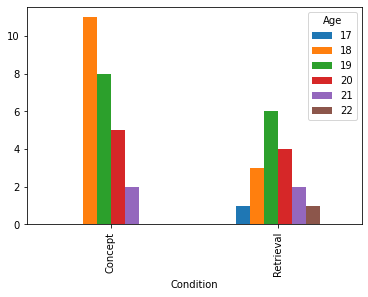

In [7]:
# YOUR CODE HERE
df = pd.read_csv("data.csv")
cond_vs_age = pd.crosstab(df["Condition"], df["Age"])
cond_vs_age.plot.bar()


<AxesSubplot:xlabel='Condition'>

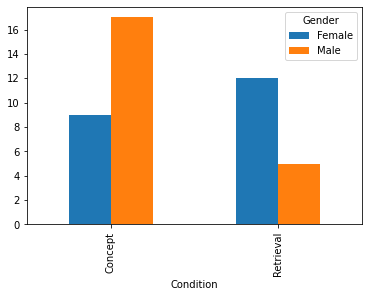

In [8]:
cond_vs_gender = pd.crosstab(df["Condition"], df["Gender"])
cond_vs_gender.plot.bar()

**YOUR EXPLANATION HERE**This experiement does not look to be completely randomized. As seen in the first visualisation, the distribution between ages and genders are not equal. Among the concept subjects, most were 18 and 19 years of age and mostly male. In the retrieval population, most subjects were 19 and female.

# Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.
2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.
2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)
3. Upload the PDF to Gradescope and Notebook (ipynb) to iLearn.